In [8]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.impute import KNNImputer

In [2]:
xTest = pd.read_csv('data/Xtest.txt',sep = ' ', index_col = 'Id')

/Users/nelsontang/Desktop/module2/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)
xTest.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.727140,1.654740,-1.097710,-1.244110,-1.435640,-0.376851,0.574999,0.730206,-0.859501,0.613872,-9.000000,-0.425670,0.326276,1.283410,0.260533,-0.247223,?,0.343297,0.900679,-1.874900,0.110853,-2.147730,-1.065340,0.291275,0.485545,-0.030703,0.064466,0.096887,-0.042067,0.090927,0.036404,-0.025910,-0.034691,-0.076142,-0.119019,0.031301,0.055641,-0.023539,0.047202,0.003573,0.775531,0.575229,0.075884,0.363873,0.554989,0.033421,0.807272,0.800452,0.861571,0,0,0,-1.903670,-0.755047,-0.412940,-9,-9,-9,-9,-9,-9,-9
6,1.205050,0.296842,-1.265870,-0.285456,-0.150170,NaN,1.084120,-1.039780,0.190630,1.059380,0.534187,0.145579,-0.951917,-0.168384,-0.099459,-2.018620,0.118709,0.013412,-1.313690,-0.027979,0.777201,-1.721460,-1.998120,1.732180,-1.982470,-1.173540,-0.103334,-0.085467,-0.012393,-0.076087,0.122670,-0.046947,0.070825,0.025333,-0.049026,0.039659,0.032205,-0.038788,-0.048956,-0.037861,-0.831560,0.211762,0.005525,0.340464,0.800078,0.265822,0.396478,0.223732,0.199441,0,0,0,-1.849470,0.541212,-0.579240,-9,-9,-9,-9,-9,-9,-9
9,-1.132310,0.307465,-0.048653,NaN,0.801982,0.038014,0.515885,-0.418177,0.082589,0.940683,1.074700,1.798310,0.658646,-0.954989,0.922123,-1.790410,-0.338825,NaN,0.781843,-0.959706,0.888815,0.633445,-0.004809,0.088348,1.221110,0.691730,0.056826,-0.015687,0.014879,0.034132,-0.020627,0.089384,-0.096474,0.035325,0.013307,0.045409,0.008459,-0.029906,0.100794,-0.039171,1.200000,0.131386,0.132647,0.580234,0.906048,0.174916,0.246667,0.070685,0.258877,0,0,0,-2.479640,-1.804930,0.764894,-9,-9,-9,-9,-9,-9,-9
12,-0.954363,-0.720769,-0.987462,NaN,-0.199311,0.773217,0.440916,0.943336,0.558700,-1.727980,-0.806496,-0.330980,0.854073,1.119300,0.923518,-0.962399,0.204848,-0.679889,-0.139566,-0.076675,NaN,NaN,-0.517915,1.863240,-0.076221,0.131434,0.090110,-0.018302,0.042275,0.020112,0.030639,-0.039688,-0.068676,-0.154153,0.027550,-0.012530,-0.049675,-0.024532,-0.008487,-0.026318,0.141018,0.826122,0.954950,0.729105,0.063835,0.869053,0.539819,0.580451,0.511207,0,0,0,-1.766040,-1.558680,-1.311400,-9,-9,-9,-9,-9,-9,-9
13,-0.535508,-0.529080,-0.681735,-0.023905,0.152597,NaN,0.261951,-0.277629,1.021780,-1.303790,0.677249,0.480057,-0.213977,0.090285,-0.569297,-2.056100,0.215238,0.649046,0.238653,0.059108,0.457152,0.711012,NaN,0.093264,-1.553700,-0.426444,0.070092,0.130168,-0.003816,-0.071428,-0.019837,-0.039779,0.059929,-0.054802,-0.001601,-0.036523,0.000889,-0.030000,0.034629,-0.000489,-0.774024,0.010775,0.906981,0.458802,0.532373,0.216771,0.400600,0.741049,0.992279,0,0,0,-1.738970,0.225965,0.360930,-9,-9,-9,-9,-9,-9,-9
15,0.124015,-0.384915,0.780509,0.019603,-0.148833,-0.102074,-1.086820,-1.336640,-1.770900,-0.048989,0.965598,0.820423,0.229443,-0.766326,NaN,-0.253121,1.20217,0.476868,-0.071412,0.169152,-1.628400,-0.617575,0.240113,-0.554089,-0.373687,-0.384608,0.155917,0.054730,-0.059930,0.089440,0.020990,0.000668,-0.032026,-0.045609,0.030283,0.065865,0.029149,-0.037295,0.004208,-0.095021,0.588366,0.403262,0.126174,0.766309,0.069709,0.282872,0.335775,0.831778,0.472666,0,0,0,-1.828700,-0.029174,-1.621040,-9,-9,-9,-9,-9,-9,-9
26,-0.560074,-0.269899,-0.012315,-1.016100,-0.752733,NaN,-0.398854,-0.813537,-0.217313,1.686180,-2.298220,0.494740,0.575973,NaN,1.127470,0.353056,-1.11363,1.041810,-0.490656,-0.196814,0.925965,0.276240,-0.883042,-0.258921,1.438970,0.490450,0.084797,0.092715,0.079228,0.017333,-0.003647,-0.003496,-0.017285,-0.023703,-0.023545,-0.016873,0.018493,0.008863,0.085622,0.079965,1.421940,0.294795,0.325444,0.637159,0.727618,0.273431,0.268606,0.696627,0.419338,0,0,0,-0.331048,-0.192682,1.118660,-9,-9,-9,-9,-9,-9,-9
29,0.437003,-0.344763,-0.108571,-0.703517,-0.105399,0.058603,0.111269,-0.621360,2.424320,NaN,0.725509,-1.565900,-

In [4]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 177731
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A01     50000 non-null  float64
 1   A02     50000 non-null  float64
 2   B01     45084 non-null  float64
 3   B02     45055 non-null  float64
 4   B03     44987 non-null  float64
 5   B04     45111 non-null  float64
 6   B05     45065 non-null  float64
 7   B06     44948 non-null  float64
 8   B07     45107 non-null  float64
 9   B08     45217 non-null  float64
 10  B09     45204 non-null  float64
 11  B10     45110 non-null  float64
 12  B11     45224 non-null  float64
 13  B12     45145 non-null  float64
 14  B13     45074 non-null  float64
 15  B14     45047 non-null  float64
 16  B15     44943 non-null  object 
 17  B16     44905 non-null  float64
 18  B17     45074 non-null  float64
 19  B18     45013 non-null  float64
 20  B19     44998 non-null  float64
 21  B20     45055 non-null  float64
 2

<AxesSubplot:>

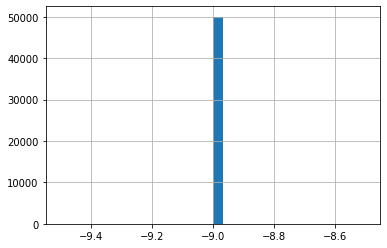

In [5]:
xTest['F12'].hist(bins=30)

In [6]:
#convert '?' to NaN
xTest = xTest.replace('?', np.nan)
#convert object to float
xTest["B15"] = xTest["B15"].astype(float)
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 177731
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A01     50000 non-null  float64
 1   A02     50000 non-null  float64
 2   B01     45084 non-null  float64
 3   B02     45055 non-null  float64
 4   B03     44987 non-null  float64
 5   B04     45111 non-null  float64
 6   B05     45065 non-null  float64
 7   B06     44948 non-null  float64
 8   B07     45107 non-null  float64
 9   B08     45217 non-null  float64
 10  B09     45204 non-null  float64
 11  B10     45110 non-null  float64
 12  B11     45224 non-null  float64
 13  B12     45145 non-null  float64
 14  B13     45074 non-null  float64
 15  B14     45047 non-null  float64
 16  B15     44942 non-null  float64
 17  B16     44905 non-null  float64
 18  B17     45074 non-null  float64
 19  B18     45013 non-null  float64
 20  B19     44998 non-null  float64
 21  B20     45055 non-null  float64
 2

In [9]:
#reference: https://scikit-learn.org/stable/modules/impute.html
imputer = KNNImputer(n_neighbors=223, weights="uniform")
imputed_xTest = imputer.fit_transform(xTest)
imputed_xTest[0]

array([ 1.72714000e+00,  1.65474000e+00, -1.09771000e+00, -1.24411000e+00,
       -1.43564000e+00, -3.76851000e-01,  5.74999000e-01,  7.30206000e-01,
       -8.59501000e-01,  6.13872000e-01, -9.00000000e+00, -4.25670000e-01,
        3.26276000e-01,  1.28341000e+00,  2.60533000e-01, -2.47223000e-01,
        2.77164396e-02,  3.43297000e-01,  9.00679000e-01, -1.87490000e+00,
        1.10853000e-01, -2.14773000e+00, -1.06534000e+00,  2.91275000e-01,
        4.85545000e-01, -3.07033000e-02,  6.44656000e-02,  9.68873000e-02,
       -4.20667000e-02,  9.09275000e-02,  3.64038000e-02, -2.59098000e-02,
       -3.46906000e-02, -7.61416000e-02, -1.19019000e-01,  3.13010000e-02,
        5.56411000e-02, -2.35387000e-02,  4.72022000e-02,  3.57319000e-03,
        7.75531000e-01,  5.75229000e-01,  7.58840000e-02,  3.63873000e-01,
        5.54989000e-01,  3.34212000e-02,  8.07272000e-01,  8.00452000e-01,
        8.61571000e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.90367000e+00, -

In [11]:
newxTest = pd.DataFrame(imputed_xTest,columns = list(xTest.columns),index = xTest.index)
newxTest.to_csv('imputed_data/imputed_Xtest.csv')

In [12]:
newxTest.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.727140,1.654740,-1.097710,-1.244110,-1.435640,-0.376851,0.574999,0.730206,-0.859501,0.613872,-9.000000,-0.425670,0.326276,1.283410,0.260533,-0.247223,0.027716,0.343297,0.900679,-1.874900,0.110853,-2.147730,-1.065340,0.291275,0.485545,-0.030703,0.064466,0.096887,-0.042067,0.090927,0.036404,-0.025910,-0.034691,-0.076142,-0.119019,0.031301,0.055641,-0.023539,0.047202,0.003573,0.775531,0.575229,0.075884,0.363873,0.554989,0.033421,0.807272,0.800452,0.861571,0.0,0.0,0.0,-1.903670,-0.755047,-0.412940,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
6,1.205050,0.296842,-1.265870,-0.285456,-0.150170,-0.082551,1.084120,-1.039780,0.190630,1.059380,0.534187,0.145579,-0.951917,-0.168384,-0.099459,-2.018620,0.118709,0.013412,-1.313690,-0.027979,0.777201,-1.721460,-1.998120,1.732180,-1.982470,-1.173540,-0.103334,-0.085467,-0.012393,-0.076087,0.122670,-0.046947,0.070825,0.025333,-0.049026,0.039659,0.032205,-0.038788,-0.048956,-0.037861,-0.831560,0.211762,0.005525,0.340464,0.800078,0.265822,0.396478,0.223732,0.199441,0.0,0.0,0.0,-1.849470,0.541212,-0.579240,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
9,-1.132310,0.307465,-0.048653,0.005714,0.801982,0.038014,0.515885,-0.418177,0.082589,0.940683,1.074700,1.798310,0.658646,-0.954989,0.922123,-1.790410,-0.338825,0.068948,0.781843,-0.959706,0.888815,0.633445,-0.004809,0.088348,1.221110,0.691730,0.056826,-0.015687,0.014879,0.034132,-0.020627,0.089384,-0.096474,0.035325,0.013307,0.045409,0.008459,-0.029906,0.100794,-0.039171,1.200000,0.131386,0.132647,0.580234,0.906048,0.174916,0.246667,0.070685,0.258877,0.0,0.0,0.0,-2.479640,-1.804930,0.764894,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
12,-0.954363,-0.720769,-0.987462,0.009936,-0.199311,0.773217,0.440916,0.943336,0.558700,-1.727980,-0.806496,-0.330980,0.854073,1.119300,0.923518,-0.962399,0.204848,-0.679889,-0.139566,-0.076675,-0.067508,0.057478,-0.517915,1.863240,-0.076221,0.131434,0.090110,-0.018302,0.042275,0.020112,0.030639,-0.039688,-0.068676,-0.154153,0.027550,-0.012530,-0.049675,-0.024532,-0.008487,-0.026318,0.141018,0.826122,0.954950,0.729105,0.063835,0.869053,0.539819,0.580451,0.511207,0.0,0.0,0.0,-1.766040,-1.558680,-1.311400,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
13,-0.535508,-0.529080,-0.681735,-0.023905,0.152597,0.107276,0.261951,-0.277629,1.021780,-1.303790,0.677249,0.480057,-0.213977,0.090285,-0.569297,-2.056100,0.215238,0.649046,0.238653,0.059108,0.457152,0.711012,0.041526,0.093264,-1.553700,-0.426444,0.070092,0.130168,-0.003816,-0.071428,-0.019837,-0.039779,0.059929,-0.054802,-0.001601,-0.036523,0.000889,-0.030000,0.034629,-0.000489,-0.774024,0.010775,0.906981,0.458802,0.532373,0.216771,0.400600,0.741049,0.992279,0.0,0.0,0.0,-1.738970,0.225965,0.360930,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
15,0.124015,-0.384915,0.780509,0.019603,-0.148833,-0.102074,-1.086820,-1.336640,-1.770900,-0.048989,0.965598,0.820423,0.229443,-0.766326,-0.396487,-0.253121,1.202170,0.476868,-0.071412,0.169152,-1.628400,-0.617575,0.240113,-0.554089,-0.373687,-0.384608,0.155917,0.054730,-0.059930,0.089440,0.020990,0.000668,-0.032026,-0.045609,0.030283,0.065865,0.029149,-0.037295,0.004208,-0.095021,0.588366,0.403262,0.126174,0.766309,0.069709,0.282872,0.335775,0.831778,0.472666,0.0,0.0,0.0,-1.828700,-0.029174,-1.621040,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
26,-0.560074,-0.269899,-0.012315,-1.016100,-0.752733,-0.025454,-0.398854,-0.813537,-0.217313,1.686180,-2.298220,0.494740,0.575973,-0.425147,1.127470,0.353056,-1.113630,1.041810,-0.490656,-0.196814,0.925965,0.276240,-0.883042,-0.258921,1.438970,0.490450,0.084797,0.092715,0.079228,0.017333,-0.003647,-0.003496,-0.017285,-0.023703,-0.023545,-0.016873,0.018493,0.008863,0.085622,0.079965,1.421940,0.294795,0.325444,0.637159,0.727618,0.273431,0.26860

In [13]:
newxTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 177731
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A01     50000 non-null  float64
 1   A02     50000 non-null  float64
 2   B01     50000 non-null  float64
 3   B02     50000 non-null  float64
 4   B03     50000 non-null  float64
 5   B04     50000 non-null  float64
 6   B05     50000 non-null  float64
 7   B06     50000 non-null  float64
 8   B07     50000 non-null  float64
 9   B08     50000 non-null  float64
 10  B09     50000 non-null  float64
 11  B10     50000 non-null  float64
 12  B11     50000 non-null  float64
 13  B12     50000 non-null  float64
 14  B13     50000 non-null  float64
 15  B14     50000 non-null  float64
 16  B15     50000 non-null  float64
 17  B16     50000 non-null  float64
 18  B17     50000 non-null  float64
 19  B18     50000 non-null  float64
 20  B19     50000 non-null  float64
 21  B20     50000 non-null  float64
 2